# Day 14: Pre-class Assignment: Modeling with Ordinary Differential Equations

### <p style="text-align: right;"> &#9989; Krizma Nagi</p>

<img src="https://static1.squarespace.com/static/59e802b9be42d61a159cbf16/5adfb43d6d2a737eeb53231a/5adfb45870a6ad380a74f016/1524612324412/Photo+Apr+17%2C+6+23+00+PM+%281%29.jpg" width= 400><p style="text-align: right;">
</p>

### Goals for today's pre-class assignment
In this assignment, you will:

* Learn the setup of some simple differential equations. (Don't panic if you have not yet taken a course on differential equations! We'll cover all of the things you need to know to develop the models for this assignment and other upcoming assignments.)
* Explore how you can use functions to define derivatives that model the evolution of a physical system.
* Review how loops can be used to update the state of an evolving system.
* Use <code>matplotlib</code> to plot the evolution of the system.
* Use NumPy when necessary to manipulate arrays or perform mathematical operations

### Assignment instructions

In this assignment there are a series of videos that walk you through what Ordinary Different Equations (ODEs) are and how you can use them to model physical systems. This will begin our foray into the world of computational modeling!

Although this assignment looks like a lot at first glance, the bulk of your time will be spent watching the videos and reading through the code from the videos. You'll then take what you learn and make minor modifications to provided code. That said, make sure you give yourself enough to watch the videos as the information presented will be useful more than once in this course!

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into the appropriate "Pre-class assignments" submission folder.  Submission instructions can be found at the end of the notebook.

---

___
## Role of ODEs in Computational Modeling

We often use equations in computational modeling. Many interesting things we wish to model involve things that are **changing**:
* changing in time
* changing in space
* changing minds
* changing strategies
* changing numbers (of people,  molecules, stars, etc.)
* changing stock prices
* and so on...

In mathematics, the way we describe change is with calculus and derivatives in particular. When an equation has a derivative in it, it is called a "[differential equation](https://en.wikipedia.org/wiki/Differential_equation)" (as opposed to, say, an algebraic equation). We'll keep it simple here and only consider what are called "[ordinary differential equations](https://en.wikipedia.org/wiki/Differential_equation#Ordinary_differential_equations)" (ODEs), the simplest version of these equations.

The types of equations can be used to model many different systems and in this assignment we'll see how they can be used to model the free-fall of a skydiver. 

So, here is the plan for the next week and a half. 

* In this pre-class you will learn the basics of differential equations and how they can be solved in Python.
* In the next in-class assignment you will apply what you've learned to model the motion of a bungee jumper. 
* Then, for the next two classes we will cover a new topic of _Compartmental Modeling_. For those two classes nearly everything we do will use [`solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html); we want you to be very good at `solve_ivp` by the end of this week so that you can focus on modeling. You will model rumors, infectious diseases, zombies, ecology and viral infections. 

The video below will introduce you to what differential equations are and how they can be used to model the motion of a skydiver. While you watch, keep in mind, what is a differential equation? How can it be used as a physical model? **You don't need to understand the physics discussed in the video -- the equations are provided for you in the cells after the video.**

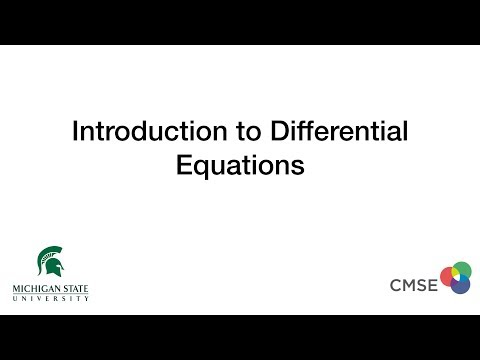

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("8QeCQn7uxnE",width=640,height=360)

&#9989;&nbsp; **Question**: Explain in your own words what differential equations are and how they can be used to model a physical system.

<font size=+3>&#9998;</font> *A differential equation is an equation compiled of derivatives, which are rates of change. They can be used to model a physical system through the usage of rates of change (derivatives) and various fuctions that show relationships in different systems.*

---
# Modeling the motion of a skydiver

Now you're going to watch a video that walks you through the process of using a set of differential equations and model the motion of a skydiver. Once you've watched the video, you'll modify the code from the video (provided below) to take into account air resistance.

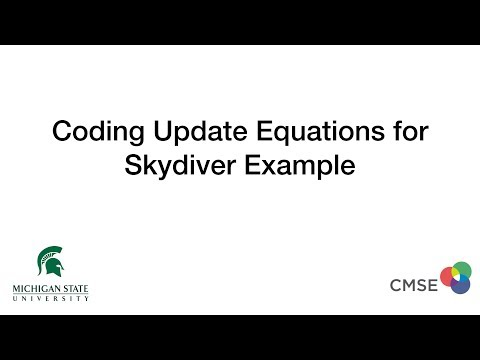

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("8MaorudJBgA",width=640,height=360)

---
## Review of the model for a falling skydiver without air resistance

### The Equations

The main variables to know are: $h$ refers to height, and $v$ refers to velocity.

$$h_{\mathrm{new}} = h_{\mathrm{old}} + \frac{dh}{dt}\Delta t$$

$$v_{\mathrm{new}} = v_{\mathrm{old}} + \frac{dv}{dt}\Delta t$$

**Note 1:** $\frac{dh}{dt} = v$, meaning that velocity is defined as the derivative of height.

**Note 2:** For the first part of this problem, $\frac{dv}{dt} = g$, where $g$ is a constant equal to $-9.81$.

---
### The `derivs` Function

In order to solve these problems numerically (i.e., using a computer), we need to specify what $\frac{dh}{dt}$ and $\frac{dv}{dt}$ are. Specifically, we’re going to define a *function* called `derivs` that will return values for the differentials we’re trying to solve. In this case, the function would have
\begin{equation}
\frac{dh}{dt} = v
\end{equation}

\begin{equation}
\frac{dv}{dt} = g
\end{equation}
And it will return the values of $\frac{dh}{dt}$ and $\frac{dv}{dt}$. 

Putting it into code, we get the following:


In [3]:
# Create a function to compute derivatives of velocity and height
def derivs(v,g):
    
    # derivative of height is velocity
    dhdt = v
    
    # derivative of velocity is gravity for this example
    dvdt = g
    
    return dhdt, dvdt

#### The `derivs` function is the heart of how we will solve differential equations.

---

### Initial Values

**The following information provides a recap of the content discussed in the video so that you don't have constantly jump back and forth in the video.**

We first will begin by assuming: 

* $h_0 = 3000$ meters
* $v_0 = 0$ meters/second
* $g = -9.81$ gravity: meters/second^2
* $t_{max} = 30$ falling duration: seconds
* $dt = 1$ timestep

### Running the Model

&#9989;&nbsp; **The following code is the same code from the video you watched above. This code numerically solves for the motion of the skydiver and plots the result. Review each line of code an make sure you understand what it's doing and then execute the code.**

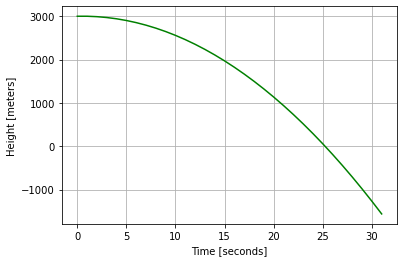

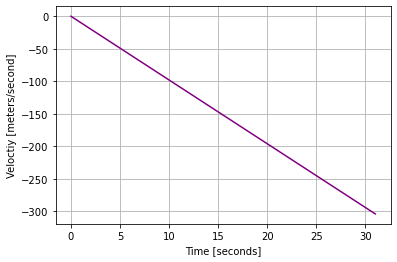

In [4]:
# Import modules
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize variables
h = 3000 # initial height: m
v = 0 # initial velocoty: m/s 
g = -9.81 # gravity: m/s^2
t = 0 # initial time
tmax = 30 # Falling time
dt = 1 # timestep

# Initialize lists for storing data
height = []
velocity = []
time = []

# Append initial values to lists
height.append(h)
velocity.append(v)
time.append(t)

# Create a time loop that will update the skydiver over time
# Use a while loop that will loop until t > tmax
while t <= tmax:
    
    # Compute derivatives for use in update equations
    dhdt, dvdt = derivs(v,g)
    
    # Update Equations
    h_new = h + dhdt*dt # new height
    
    v_new = v + dvdt*dt # new velocity
    
    # Append values to height and velocity lists
    height.append(h_new)
    velocity.append(v_new)
    
    # Update old height/velocity with new height
    h = h_new
    v = v_new
    
    # Increase time
    t += dt # t = t + dt
    
    # Update time list
    time.append(t)
    
# Plotting height/velocity vs time 
plt.figure(1)
plt.plot(time, height, color = 'green')
plt.xlabel('Time [seconds]')
plt.ylabel('Height [meters]')
plt.grid()

plt.figure(2)
plt.plot(time, velocity, color = 'purple')
plt.xlabel('Time [seconds]')
plt.ylabel('Veloctiy [meters/second]')
plt.grid()

&#9989;&nbsp; **Question:** If you want the model to stop when the skydiver hits the ground (going far too fast at the moment!), how might you build that into the model?

<font size=+3>&#9998;</font> *You can add a part into the loop that has the restriction of h being greater than 0. If h=0, that means the skydiver has hit the ground, so making sure that h>0 will ensure that the the skydiver stops when they hit the ground in the model.*

---
## Adding air resistance to the model

As we can see from our plots above, without air resistance the skydiver continously decreases velocity (or, "accelerates") under the force of gravity. If they start high enough, they could reach *very big* velocities!  In reality, this isn't how skydiving works, eventually the skydiver reaches a constant **"terminal velocity"**. Check out [this video](https://www.youtube.com/watch?v=ur40O6nQHsw) to learn more about air resistance and terminal velocity if you're interested.

All you need to know is, the derivative of velocity (also known as acceleration) becomes dependent on the skydiver's velocity. It is defined to be:

$$\frac{dv}{dt} = \frac{-0.65~A~v~\left|v\right|}{m} + g$$

In this equation, $A$ is the projected area of the skydiver, $\left|v\right|$ is the absolute value of the velocity, and the $m$ is the mass of skydiver. These make up the left term, or the acceleration due to air resistance. The right term, $g$, is the acceleration from gravity, which was used in the code above.

As before, you are going to **model the free-fall of the sky-diver for a total of 30 seconds**, but now you need to take into account air resistance, using the formula above. You can assume that the projected area of the skydiver is **0.4 m$^2$** and their mass is **80 kg**. Also assume that the skydiver is jumping out of a helicopter at **an initial height of 2000 m** and use **a new timestep size of 0.1 seconds**.

&#9989;&nbsp; **Modify the above code** (don't write new code from scratch!) to account for air resistance in the model while using the provided area of the skydiver and the new initial height. Make sure that your new plots make sense. You should see that the velocity flattens out to a constant value, the terminal velocity.

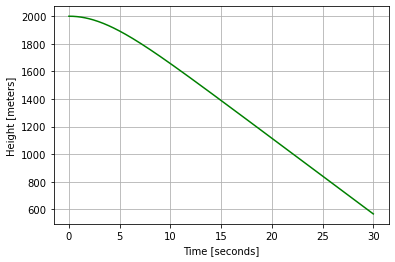

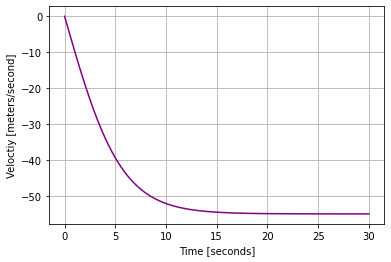

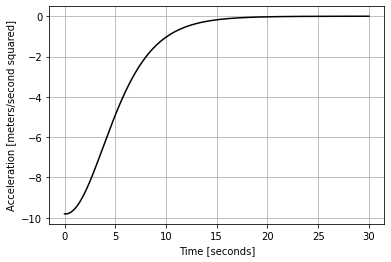

In [34]:
h = 2000 # initial height: m
v = 0 # initial velocoty: m/s 
g = -9.81 # gravity: m/s^2
t = 0 # initial time
tmax = 30 # Falling time
dt = 0.1 # timestep

# Initialize lists for storing data
height = []
velocity = []
time = []
acc = []

# Append initial values to lists
height.append(h)
velocity.append(v)
time.append(t)
acc.append(g)

# air resistance is taken to account
def derivs(v,g):
    dhdt = v
    area = 0.4
    mass = 80
    a_resist = (-0.65*area*v*abs(v))/mass
    dvdt = g + a_resist
    return dhdt, dvdt

# Use a while loop that will loop until t > tmax
while t <= tmax:
    
    # Compute derivatives for use in update equations
    dhdt, dvdt = derivs(v,g)
    
    # Update Equations
    h_new = h + dhdt*dt # new height
    
    v_new = v + dvdt*dt # new velocity
    
    # Append values to height and velocity lists
    height.append(h_new)
    velocity.append(v_new)
    acc.append(dvdt)
    
    # Update old height/velocity with new height
    h = h_new
    v = v_new
    
    # Increase time
    t += dt # t = t + dt
    
    # Update time list
    time.append(t)
    
# Plotting height/velocity vs time 
plt.figure(1)
plt.plot(time, height, color = 'green')
plt.xlabel('Time [seconds]')
plt.ylabel('Height [meters]')
plt.grid()

plt.figure(2)
plt.plot(time, velocity, color = 'purple')
plt.xlabel('Time [seconds]')
plt.ylabel('Veloctiy [meters/second]')
plt.grid()

#plotting acceleration vs time
plt.figure(3)
plt.plot(time, acc, color = 'black')
plt.xlabel('Time [seconds]')
plt.ylabel('Acceleration [meters/second squared]')
plt.grid()

&#9989;&nbsp; **Question**: Based on your results, what does the terminal velocity of the skydiver appear to be?

<font size=+3>&#9998;</font> *The terminal velocity looks to be about -25 meters/second from the velocity graph.*

---
## Modeling the falling skydiver using solve_ivp

As with many computational models, there is often more than one way to find a solution. In fact, Python has a software library called SciPy that includes a tool for solving sets of differential questions called `solve_ivp`.

Watch the following video to learn how we can use this tool to model the motion of the skydiver. The SciPy documentation highlighted in the video can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html).

If the YouTube video doesn't work, try this [MediaSpace link](https://mediaspace.msu.edu/media/Solving+differential+equations+with+solve_ivp%28%29/1_qxx76gdo).

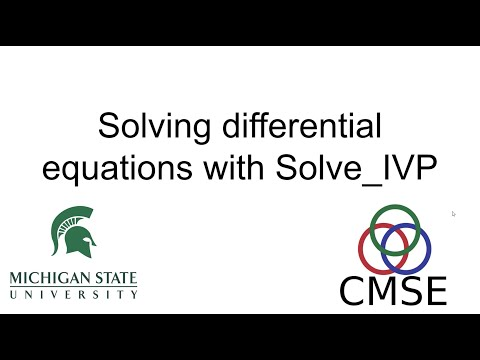

In [9]:
from IPython.display import YouTubeVideo
# You may want to watch the video in full screen to make sure you can see everything!
YouTubeVideo("QGmJrEUNXA8",width=640,height=360)

---
## Reviewing the solve_ivp solution for the skydiver problem.

The code below is the same code used in the video to model the skydiver using the SciPy `solve_ivp` tool.

&#9989;&nbsp; **Review the code and make sure you understand each line then execute the code.**

In [21]:
# Derivative function
def derivs(time,curr_vals):
    
    # Declare parameters
    g = -9.81 # m/s^2
    
    # Unpack the current values of the variables we wish to "update" from the curr_vals list
    h, v = curr_vals
    
    # Right-hand side of odes, which are used to computer the derivative
    dhdt = v
    dvdt = g
    
    return dhdt, dvdt

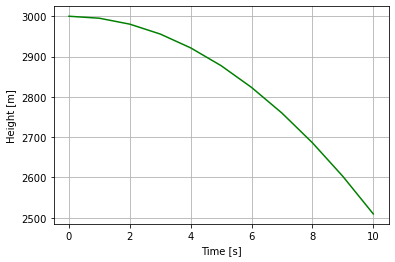

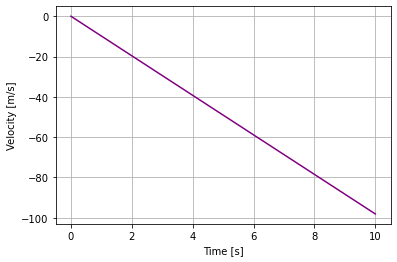

In [11]:
# Import commands
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import solve_ivp # This one is new to you!

# Declare Variables for initial conditions
h0 = 3000 # meters
v0 = 0 # m/s
tmax = 10 # seconds
dt = 1 # seconds

# Define the time array
time = np.arange(0, tmax + dt, dt)

# Store the initial values in a list
init = [h0, v0]

# Solve the odes with solve_ivp
sol = solve_ivp(derivs,(0,tmax),init,t_eval = time)
    
# Plot the results using the values stored in the solution variable, "sol"

# Plot the height using the "0" element from the solution
plt.figure(1)
plt.plot(time, sol.y[0,:],color="green")
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.grid()

# Plot the velocity using the \"1\" element from the solution
plt.figure(2)
plt.plot(time, sol.y[1,:],color="purple")
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.grid()

---
## Adding air resistance to the solve_ivp solution

&#9989;&nbsp; Now you're going to **modify the provided code that uses `solve_ivp`** to include air resistance **using the same parameters you used when you added air resistance previously**. Make sure that the solution is computed for **30 seconds** of skydiver freefall time and ensure that you get plots that look similar to your previous solution.

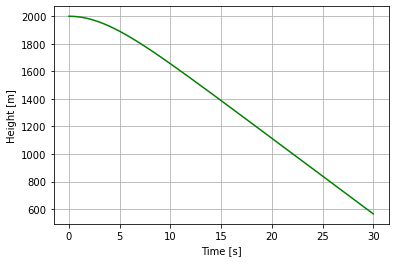

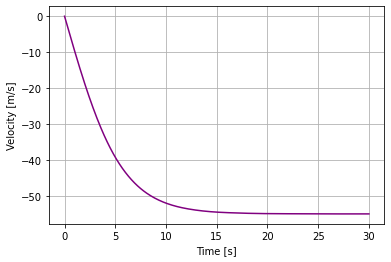

In [32]:
def derivs(time,curr_vals):
    g = -9.81 # m/s^2
    h, v = curr_vals
    dhdt = v
    area = 0.4
    mass = 80
    a_resist = (-0.65*area*v*abs(v))/mass
    dvdt = g + a_resist
    return dhdt, dvdt

h0 = 2000 # meters
v0 = 0 # m/s
tmax = 30 # seconds
dt = 0.1 # seconds

# Define the time array
time = np.arange(0, tmax + dt, dt)

# Store the initial values in a list
init = [h0, v0]

# Solve the odes with solve_ivp
sol = solve_ivp(derivs,(0,tmax),init,t_eval = time)
    
# Plot the results using the values stored in the solution variable, "sol"

# Plot the height using the "0" element from the solution
plt.figure(1)
plt.plot(time, sol.y[0,:],color="green")
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.grid()

# Plot the velocity using the \"1\" element from the solution
plt.figure(2)
plt.plot(time, sol.y[1,:],color="purple")
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.grid()

&#9989;&nbsp; **Question**: Do your plots of the height and velocity of the skydiver from `solve_ivp` agree with your solution when you used the update equations?

<font size=+3>&#9998;</font> Yes the height and velocity plots agree with the solution when the updated equations are used.

---
### Assignment wrapup

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [33]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course D2L web page.  Go to the "Pre-class assignments" folder, find the appropriate submission link, and upload it there.

See you in class!

&#169; Copyright 2018,  Michigan State University Board of Trustees